### Import libararies first

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

/Users/rinusvangrunsven/opt/anaconda3/envs/dspa2/lib/python3.6/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Load data and plot outcomes for first insight

,activity,appCat.values,call,circumplex.values,mood,screen,sms
time,,,,,,,
2014-02-17,0.041548,21.900333,1.0,0.125000,6.250000,22.162157,0.0
2014-02-18,0.015309,22.311789,1.0,-0.142857,6.500000,56.542267,0.0
2014-02-19,0.064394,37.849680,1.0,0.100000,6.600000,137.494630,1.0
2014-02-20,0.039220,38.048714,1.0,0.000000,6.333334,117.011760,1.0
2014-02-21,0.042033,12.750950,1.0,0.600000,7.200000,33.210304,1.0
...,...,...,...,...,...,...,...
2014-05-27,0.012704,29.703531,1.0,-0.100000,6.200000,113.607750,1.0
2014-05-28,0.103301,27.164436,1.0,0.600000,8.200000,113.657684,1.0
2014-05-29,0.169354,32.128033,1.0,-0.166667,7.000000,118.978035,1.0


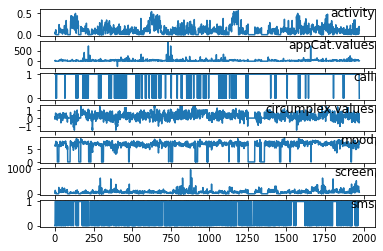

In [2]:
from pandas import read_csv

dataset = read_csv('data/testtest3.csv', header=0, index_col=0)
display(dataset)
values = dataset.values

# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
    # pyplot.figure(figsize=(1,1))
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# 2. Run LGBM model

In [3]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

dataset = read_csv('data/testtest3.csv', header=0)

# train, test = train_test_split(dataset, test_size=0.2, random_state=25)

features_train = ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms']
target_train = 'mood'

X_train, X_val, y_train, y_val = train_test_split(
    dataset[features_train], dataset[target_train], test_size=0.2)

train_data = lgbm.Dataset(X_train, label=y_train)

test_data = lgbm.Dataset(X_val, label=y_val)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 34.4461
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 34.4535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 34.4524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 34.4559
[5]	valid_0's l2: 34.438
[6

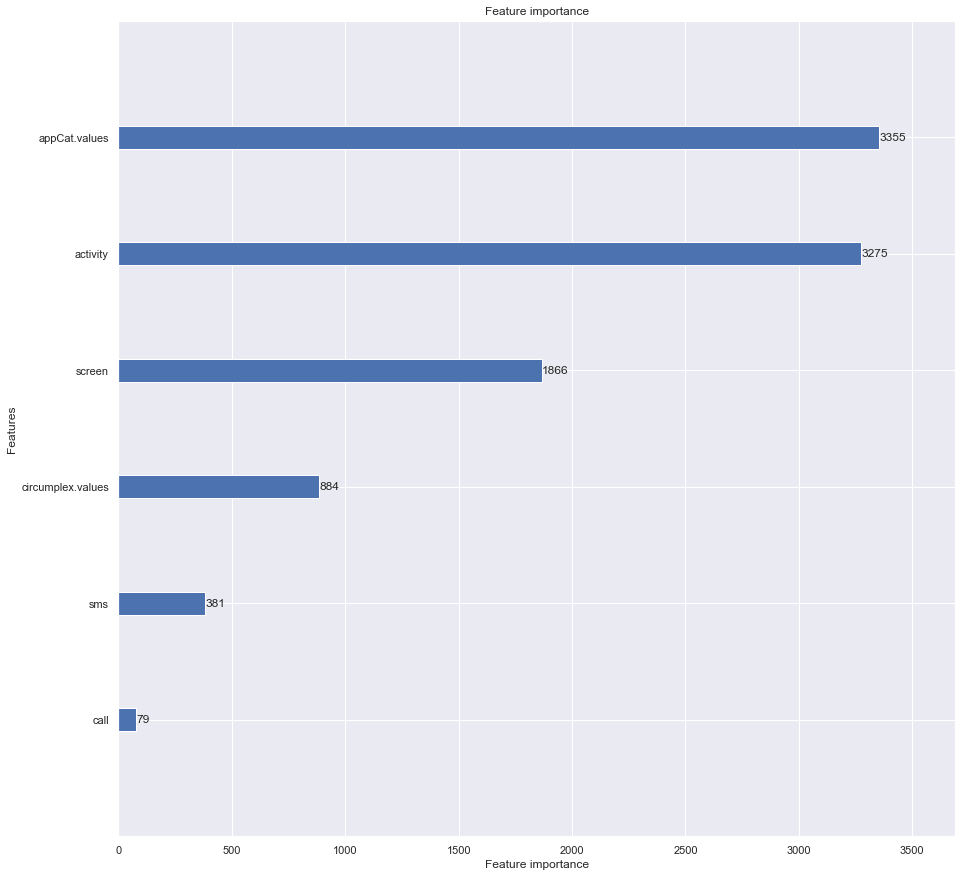

In [4]:
# determine style
sns.set_theme(style="darkgrid")

#basic parameter:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'mse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 25,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

# determine model
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

# plot and show feature importance
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15, 15))
plt.show()

In [5]:
hyper_params = {
    'random_state': 420,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.1,
    "num_leaves": 256,
    'max_depth': 9,
    # 'min_data_in_leaf': 70,
    # "max_bin": 512,
}

train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature='auto')
test_data = lgbm.Dataset(X_val, label=y_val, categorical_feature='auto')

model = lgbm.train(hyper_params, train_data, num_boost_round=500, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 1578, number of used features: 6
[LightGBM] [Info] Start training from score 6.340684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [6]:

# save
with open('models/LGBM_MSE.pkl','wb') as f:
    pickle.dump(model,f)

In [7]:
y_pred = model.predict(X_val[features_train])

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [8]:



mse = mean_squared_error(predictions['actual'], predictions['predicted'])
mae = mean_absolute_error(predictions['actual'], predictions['predicted'])

print(f"MSE is: {mse}")
print(f"MAE is: {mae}")



MSE is: 1.2710586577685201
MAE is: 0.6176598655280303


# 3. Run multiple models and combine scores in a graph

In [9]:

Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [10]:
origin_features =  ['activity', 'appCat.values', 'call', 'circumplex.values', 'screen', 'sms'
                    ]

target_train = 'mood'

# using the full set for training
training_set = dataset[origin_features + [target_train]].sample(500)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(target_train, axis=1)
y = training_set[target_train]

features = X.columns

# built a validation set on flights_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model_columns = []
models_compare = pd.DataFrame(columns = model_columns)
results=[]

row_index = 0
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

    model1 = model.fit(X_train,y_train)
    Y_predict = model1.predict(X_test)
    results.append(Y_predict)
    mae_score = mean_absolute_error(y_test, Y_predict)
    mse_score = mean_squared_error(y_test, Y_predict)
    rmse_score = np.sqrt(mean_squared_error(y_test, Y_predict))
    # r2_score = r2_score(y_test, Y_predict)
    # MLA_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = name
    models_compare.loc[row_index, 'MAE'] = mae_score
    models_compare.loc[row_index, 'MSE'] = mse_score
    models_compare.loc[row_index, 'RMSE'] = rmse_score   

    # cv_results = cross_val_score(model, X_train, y_train, cv=10)
    # results.append(cv_results)
    # predicted = model.fit(X_train, y_train).predict(X_test)
    # fp, tp, th = roc_curve(y_test, predicted)
    # MLA_name = model.__class__.__name__
    # MLA_compare.loc[row_index,'Model Name'] = model
    # MLA_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(X_train, y_train), 4)
    # MLA_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(X_test, y_test), 4)
    # MLA_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)
    
    row_index+=1
    
models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
models_compare

,Model Name,MAE,MSE,RMSE
4,Decision Tree Regressor,0.577177,0.624053,0.789970
3,Random forest Regressor,0.680175,1.116503,1.056647
7,Boosted Ridge,1.454847,3.708256,1.925683
5,Boosted Linear,1.507095,3.807286,1.951227
8,Bagged Linear,1.381606,4.248040,2.061077
1,Linear Regression,1.383669,4.254278,2.062590
10,Bagged Ridge,1.365739,4.290381,2.071324
2,Ridge,1.363885,4.294520,2.072322
6,Boosted Lasso,1.547427,5.337956,2.310402
9,Bagged Lasso,1.514456,5.418357,2.327736


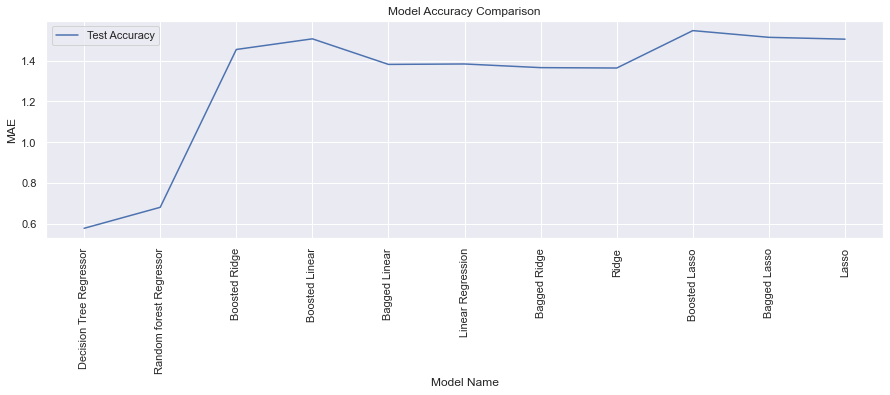

In [12]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="Model Name", y="MAE",data=models_compare,label='Test Accuracy')
# sns.lineplot(x="Model Name", y="Model Test Accuracy",data=models_compare,label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

# 4. LSTM model

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

ValueError: Unknown label type: 'continuous'